# Random Variables

A **random variable**, X,  is a variable quantity (i.e., not necessarily fixed) whose possible values depend on a set of random events. Like a traditional mathematical variable, its value is unknown a priori (before the outcome of the events is known)
A random variable's possible values might represent the possible outcomes of a yet to occur event. This event  can take on a range of values, each with an associated probability, giving the random variable a probability distribution


For example, the value of a roll of a die is a random variable. This variable,X, can take values 1 - 6, each with a probability of ⅙, but it’s exact value is unknown till the die roll is actually performed.

A **probability distribution** is a mathematical function that assigns a probability to every possible value of a random variable.
For example, the random variable X that represents the value of a die rolls and can take values 1 to 6, each with a probability of ⅙ has a distribution: $P(X=i) = 1/6$, where i = 1,2,3,4,5,6

Random variables can be separated into two different classes:
 - Discrete random variables
 - Continuous random variables

### Discrete Random Variables

Discrete Random Variable have finitely countable outcomes. For example, the value of a coin toss can only be H or T, each with a probability of $1/2$. Similarly the value of a die roll can only be between 1 and 6

For discrete random variables where X can take a finite set of values, the probability distribution function,  gives the probability $p(x)$ that X is exactly equal to some value.
$p(x) = P(X=x)$, where x belongs to the finite set of values that are possible

A probability distribution function has two main properties:
1. $0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0, 1]$
2. The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.

## Uniform Distrobution

Let's look at the distribution of a die roll below. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.stats as stats
from auquanToolbox import dataloader as dl
from __future__ import division

In [3]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

A die roll can have 6 values, each value can occur with a probability of $1/6$. Each time we roll the die, we have an equal chance of getting each face. This is an example of uniform distribution. The chart below shows distribution for 10 die rolls.

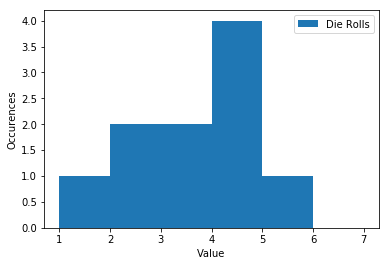

In [4]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls'])
plt.show()

In the short run this looks uneven, but if we take a large number of samples it is apparent that each face is occurring the same percentage of times. The chart below shows distribution for 10,000 die rolls

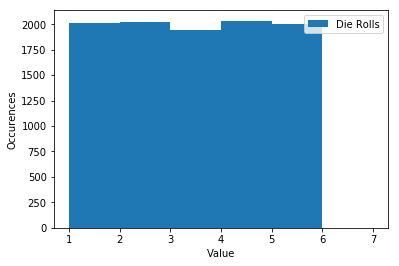

In [5]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);
plt.show()

A random variable is **independent and identically distributed** *(i.i.d)* if each random variable has the same probability distribution as the others and all are mutually independent, i.e. outcome of one doesn’t affect the other. For example, random variables representing die rolls are i.i.d. The value of one die roll does not affect the value of next die roll.

## Binomial Distribution

A binomial distribution is used to describe successes and failures in a binary experiment. This can be very useful in an investment context as many of our choices tend to be binary like this. A single experiment which can result in success with probability p and failure with probability (1-p) is called a Bernoulli trial.

$$p(1) = P(X = 1) = p \ \ \ \ \ \ \\
p(0) = P(X = 0) = 1-p$$

A binomial distribution is a set of $n$ Bernoulli trials. There can be between $0$ and $n$ successes in $n$ trials, with each trial having the same probability of success, $p$, and all of the trials being independent of each other. A binomial random variable is denoted as $X$ **~** $B(n, p)$. 

The probability function of a binomial random variable $p(x)$ is the probability that there are exactly $x$ sucesses in $n$ trials. This is defined by choosing $x$ trials which should result in success and multiplying by the probability that these $x$ trails result in success and the remaining $n - x$ trials result in failure. The resulting probability function is:

$$
p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}
$$

If $X$ is a binomial random variable distributed with $B(n, p)$.

In [6]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

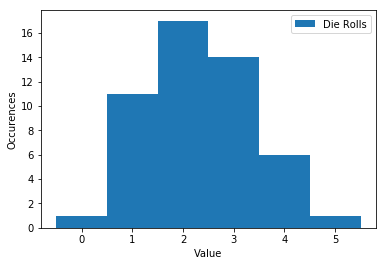

In [7]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);
plt.show()

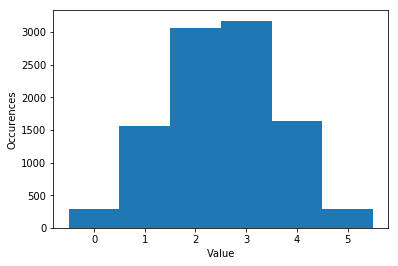

In [8]:
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');
plt.show()

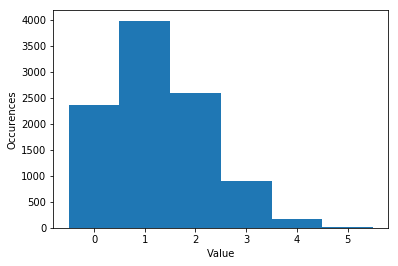

In [9]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');
plt.show()

## Continuous Random Variables

In [10]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

In [11]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

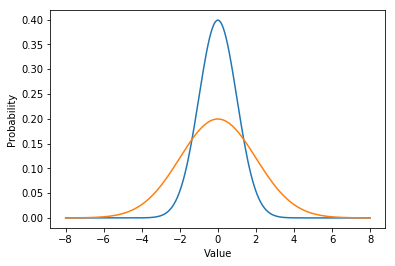

In [12]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');
plt.show()

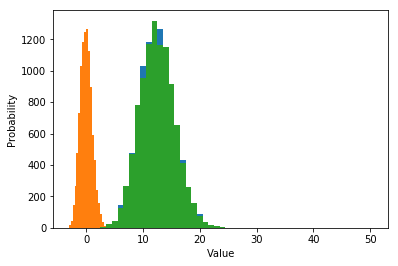

In [15]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');
plt.show()

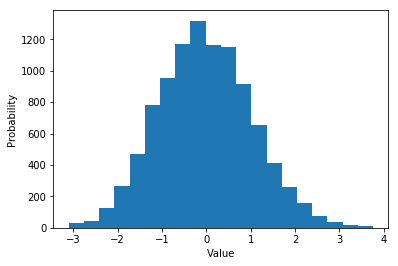

In [16]:
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');
plt.show()

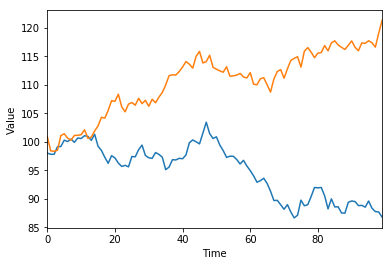

In [18]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

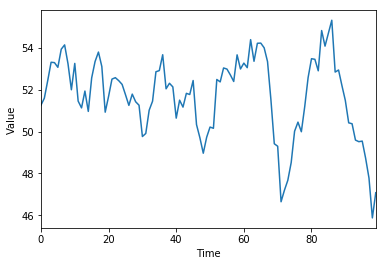

In [19]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');
plt.show()

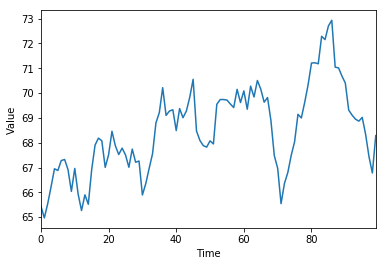

In [20]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');
plt.show()

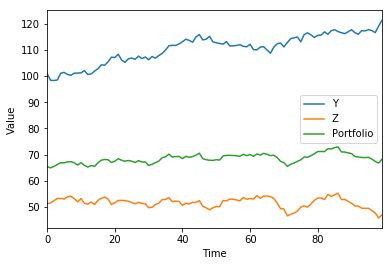

In [21]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');
plt.show()

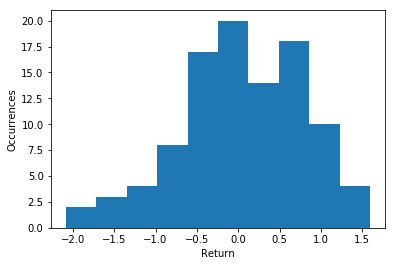

In [22]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');
plt.show()

In [35]:
start = '2015-01-01'
end = '2016-01-01'
data = dl.load_data_nologs('nasdaq', ['AAPL'], start, end)
prices = data['CLOSE']

In [55]:
# Take the daily returns
returns = prices/prices.shift(-1) -1

#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stats.stattools.jarque_bera(returns)
print("The JB test p-value is: ", p_value)
print("We reject the hypothesis that the data are normally distributed ", p_value < cutoff)
print("The skewness of the returns is: %s"%skewness)
print("The kurtosis of the returns is: %s"%kurtosis)
plt.hist(returns.price, bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

NameError: name 'stats' is not defined

In [60]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns['AAPL'][:-1])
sample_std_dev = np.std(returns['AAPL'][:-1])

In [64]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/(sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.plot(returns['AAPL'])#, bins = 20, normed = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');
plt.show()

ValueError: ordinal must be >= 1